<h3 style=" text-align: center;">Logistic regression (II)</h3>
<br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('test.csv', header=None)
#((x,y) points)
X = np.array(data[[0,1]])
#point class: 1 or 0
pointType = np.array(data[2])

#array data points: x1, x2
data = np.array([
    [1,10,1],
    [3,10,0],
    [1.8,2.0,0],
    [-1,-1,1],
    [-2,10,1],
])
#X = data[:, [0,1]]
#pointType = data[:, [2]]
#pointType = pointType.flatten()

datamin = np.min(X, axis=0)
datamax = np.max(X, axis=0)
xmin, ymin = datamin
xmax, ymax = datamax

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k',zorder=2)
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k',zorder=2)

def display(m, b, color='g--'):
    more = 2
    #plt.xlim(-0.05,1.05)
    #plt.ylim(-0.05,1.05)
    plt.xlim(xmin-more,xmax+more)
    plt.ylim(ymin-more,ymax+more)    
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color,zorder=1)

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$


========== Epoch 0 ==========
Train loss:  0.949492036808939
Accuracy:  0.42857142857142855

========== Epoch 15 ==========
Train loss:  0.6509309178786907
Accuracy:  0.5714285714285714

========== Epoch 30 ==========
Train loss:  0.5651934109468771
Accuracy:  0.5714285714285714

========== Epoch 45 ==========
Train loss:  0.4984434791317308
Accuracy:  0.7142857142857143

========== Epoch 60 ==========
Train loss:  0.4463276380272808
Accuracy:  0.8571428571428571

========== Epoch 75 ==========
Train loss:  0.4050535429276207
Accuracy:  0.8571428571428571

========== Epoch 90 ==========
Train loss:  0.3718394040746979
Accuracy:  0.8571428571428571

========== Epoch 105 ==========
Train loss:  0.3446827546773596
Accuracy:  1.0

========== Epoch 120 ==========
Train loss:  0.3221427891822077
Accuracy:  1.0

========== Epoch 135 ==========
Train loss:  0.3031745559211408
Accuracy:  1.0


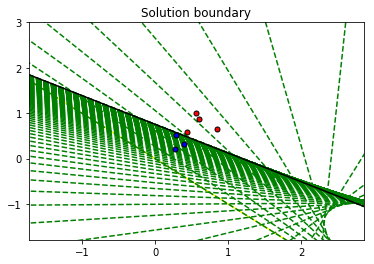

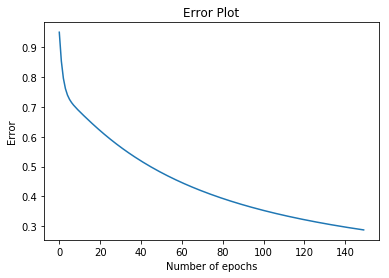

In [2]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def score(points,weights,bias):
    #print(points,weights,bias)
    return (np.dot(points, weights) + bias)

#likelihood function
#yhat:continuous prediction function which returns [0,1] prob. instead of {0,1} discrete values
def probability(score):
    return sigmoid(score)

#0 class points have 1-p probability to be correct classified
def likelihood(y,p):
    return y*(p) + (1 - y) * (1-p)

#error function
#log_loss = log_likelihood = -1 *log(likelihood)
def log_loss(likelihood):
    return -1*np.log(likelihood)

#d/dw(log_loss) = (y-log_loss)*xi
#d/db(log_loss) = (y-log_loss)
#w = w + learn_rate * d/dw(log_loss)
#b = b + learn_rate * d/db(log_loss)
def update(x, y, weights, bias, learnrate):
    s = score(x,weights,bias)
    p = probability(s)
        
    #print("d->",y-yhat,"=",y,"-",yhat)
    weights += learnrate * (y-p) * x
    bias += learnrate * (y-p)
    return weights, bias    

epochs = 150
learnrate = 0.1
#setting random weights
#n_records, n_features = X.shape
#weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
#print(weights)
#weights = [-1,1]
weights=[1,1]
bias = 0
errors = []
last_loss = None

display(-weights[0]/weights[1], -bias/weights[1],'yellow')

for e in range(epochs):
    display(-weights[0]/weights[1], -bias/weights[1])
    
    for x, y in zip(X, pointType):
        
        #s = score(x,weights,bias)
        #p = probability(s)
        #l = likelihood(y,p)        
        #err = log_loss(l)
        
        #print("x,y=",x,"pointType=",y,"b=",bias,"weights=",weights)
        #print("sum",s)
        #print("p=",p)
        #print(l)
        #print(err)

        weights,bias = update(x, y, weights, bias, learnrate)
                
    s = score(X,weights,bias)
    p = probability(s)
    l = likelihood(pointType,p)        
    err = log_loss(l)
    loss = np.mean(err)
    errors.append(loss)    


    if e % (epochs / 10) == 0:
        print("\n========== Epoch", e,"==========")
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss) 
        last_loss = loss    

        #y-hat(output) > 0.5 => point type 1 ; < 0.5 => point type 0
        predictions = p > 0.5

        accuracy = np.mean(predictions == pointType)
        print("Accuracy: ", accuracy)  
        
        #if (accuracy == 1): break
    
# Plotting the solution boundary (last generated line)
plt.title("Solution boundary")
display(-weights[0]/weights[1], -bias/weights[1], 'black')

# Plotting the data
plot_points(X, pointType)
plt.show()

# Plotting the error
plt.title("Error Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.plot(errors)
plt.show()

Reference

<a href="https://classroom.udacity.com/courses/ud188/lessons/b4ca7aaa-b346-43b1-ae7d-20d27b2eab65/concepts/64f025bd-1d7b-42fb-9f13-8559242c1ec9">Udacity-Gradient descent</a>